# imports

In [55]:
import os
import spacy
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hierarchy
from scipy.spatial.distance import pdist
from nltk.stem.porter import PorterStemmer
from scipy.cluster.hierarchy import linkage
from glove_db import Glove

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


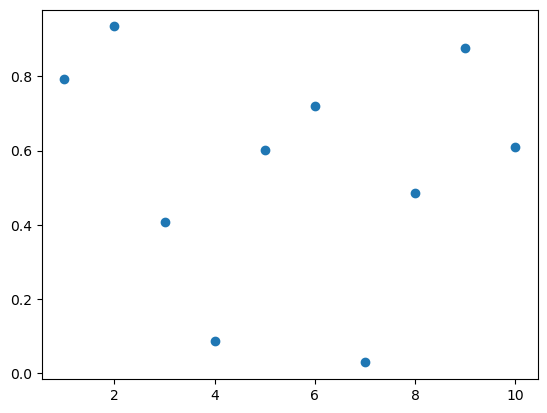

In [56]:
# make a vector, X, counting from 1 to 10
X = np.arange(1, 11).reshape(-1, 1)

# plot the vector in a scatter plot against another random vector
plt.scatter(X, np.random.rand(10))
plt.show()

# load words and GloVe vectors

In [57]:
path = './'

glove = Glove(path)

# words originally from https://github.com/first20hours/google-10000-english
# with additional filtering by me
all_clue_words = np.load(os.path.join(path, 'all_clue_words.npy'))
all_clue_vectors = np.load(os.path.join(path, 'all_clue_vectors.npy'))

print('stemming clue words')
stemmer = PorterStemmer()
all_stemmed_words = np.array([stemmer.stem(word) for word in all_clue_words])

stemming clue words


## Hierarchical Clustering

In [58]:
words = ['cat', 'dog', 'house', 
         'tree', 'flower', 'fish']

In [59]:
def cosine_similarity(x, y):
    return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

def cosine_similarity2(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))

In [60]:
# example
print('cosine similarity (smaller is better):')
print('dist(dog,    cat)    =', np.round(cosine_similarity(glove.vector('cat'), glove.vector('dog')), 3))
print('dist(dog,    tree)   =', np.round(cosine_similarity(glove.vector('dog'), glove.vector('house')), 3))
print('dist(flower, tree)   =', np.round(cosine_similarity(glove.vector('flower'), glove.vector('tree')), 3))
print('dist(dog,    flower) =', np.round(cosine_similarity(glove.vector('dog'), glove.vector('flower')), 3))

# example
print('cosine similarity (smaller is better):')
print('dist(dog,    cat)    =', np.round(cosine_similarity2(glove.vector('cat'), glove.vector('dog')), 3))
print('dist(dog,    tree)   =', np.round(cosine_similarity2(glove.vector('dog'), glove.vector('house')), 3))
print('dist(flower, tree)   =', np.round(cosine_similarity2(glove.vector('flower'), glove.vector('tree')), 3))
print('dist(dog,    flower) =', np.round(cosine_similarity2(glove.vector('dog'), glove.vector('flower')), 3))

cosine similarity (smaller is better):
dist(dog,    cat)    = 0.318
dist(dog,    tree)   = 0.713
dist(flower, tree)   = 0.539
dist(dog,    flower) = 0.829
cosine similarity (smaller is better):
dist(dog,    cat)    = 0.318
dist(dog,    tree)   = 0.713
dist(flower, tree)   = 0.539
dist(dog,    flower) = 0.829


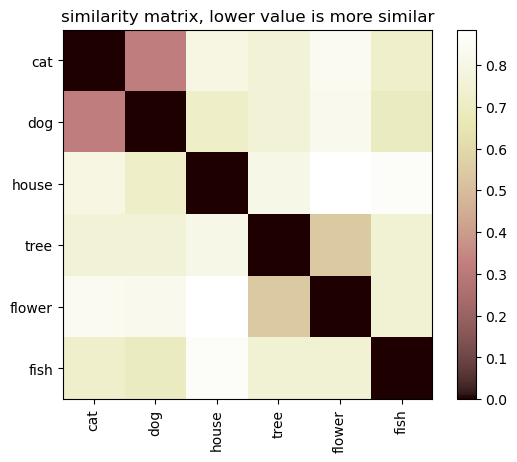

In [61]:
# use the wordA.similarity(wordB) metric
# to get a similarity matrix
similarity_matrix = np.zeros((len(words), len(words)))
# [ ] vectorize this
for i in range(len(words)):
    vector_i = glove.vector(words[i].lower())
    for j in range(len(words)):
        vector_j = glove.vector(words[j].lower())
        similarity_matrix[i, j] = cosine_similarity(vector_i, vector_j)

# plot the similarity matrix with the words on the axes
plt.imshow(similarity_matrix, cmap='pink', interpolation='nearest')
plt.xticks(np.arange(len(words)), words, rotation='vertical')
plt.yticks(np.arange(len(words)), words)
plt.colorbar()
plt.title('similarity matrix, lower value is more similar')
plt.show()

In [62]:
condensed_similarity_matrix = pdist(similarity_matrix)
# use the similarity matrix to cluster the words
Z = hierarchy.linkage(condensed_similarity_matrix, 'average')
Z

array([[0.        , 1.        , 0.45871543, 2.        ],
       [3.        , 4.        , 0.77507536, 2.        ],
       [5.        , 6.        , 1.08339834, 3.        ],
       [2.        , 8.        , 1.1873115 , 4.        ],
       [7.        , 9.        , 1.20697873, 6.        ]])

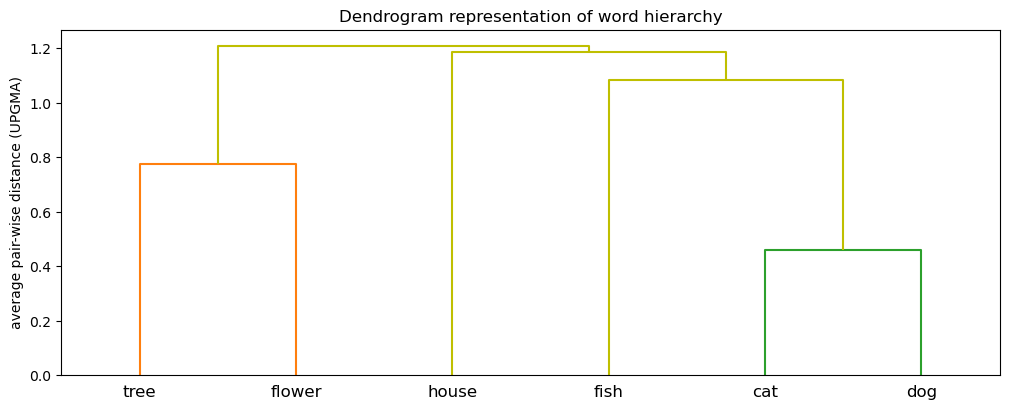

In [63]:
# plot the dendrogram
#hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig = plt.figure(figsize=(10, 4))
dn1 = hierarchy.dendrogram(Z, above_threshold_color='y',
                           orientation='top', labels=words)

# put the words on the x-axis rotated
plt.tight_layout()  # fixes margins
plt.title('Dendrogram representation of word hierarchy')
plt.ylabel('average pair-wise distance (UPGMA)')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

## vectorized similarity matrix

In [64]:
similarity_matrix = np.zeros((len(words), len(words)))
for i in range(len(words)):
    vector_i = glove.vector(words[i].lower())
    for j in range(len(words)):
        vector_j = glove.vector(words[j].lower())
        similarity_matrix[i, j] = cosine_similarity(vector_i, vector_j)
condensed_similarity_matrix = pdist(similarity_matrix)
# use the similarity matrix to cluster the words
Z = linkage(condensed_similarity_matrix, 'average')
Z

array([[0.        , 1.        , 0.45871543, 2.        ],
       [3.        , 4.        , 0.77507536, 2.        ],
       [5.        , 6.        , 1.08339834, 3.        ],
       [2.        , 8.        , 1.1873115 , 4.        ],
       [7.        , 9.        , 1.20697873, 6.        ]])

[6.326409  6.673079  6.6409283 6.985393  6.9170833 7.056281 ]Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

[6.326409  6.673079  6.6409283 6.985393  6.9170833 7.056281 ]

[6.326409  6.673079  6.6409283 6.985393  6.9170833 7.056281 ]
[6.326409  6.673079  6.6409283 6.985393  6.9170833 7.056281 ]


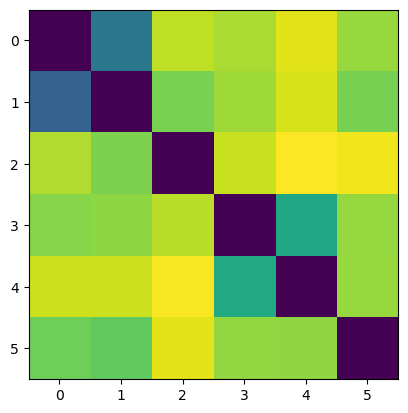

In [65]:
vectors = np.array([glove.vector(word.lower()) for word in words])
dists = vectors @ vectors.T
vectors_normed_a0 = np.linalg.norm(vectors, axis=1)
vectors_normed_b0 = np.linalg.norm(vectors, axis=1)
vectors_normed_a = np.sqrt(np.sum(vectors**2, axis=1))
vectors_normed_b = np.sqrt(np.sum(vectors**2, axis=1))
print(vectors_normed_a)
print(vectors_normed_a0)
print()
print(vectors_normed_b)
print(vectors_normed_b0)

dists = 1 - dists / (vectors_normed_a * vectors_normed_b)
plt.imshow(dists)

## make new clue words and vectors

In [34]:
with open('google-10000-english-no-swears.txt', 'r') as f:
    all_words = f.read().split('\n')

# iterate over all_words, and only keep the words that are in glove and have part of speech noun, verb, adjective, or adjective
nlp = spacy.load('en_core_web_sm')
all_clue_words = []
all_clue_vectors = []
for word in all_words:
    vector = glove.vector(word)
    if vector is not None:
        doc = nlp(word)
        if doc[0].pos_ in ['NOUN', 'VERB', 'ADJ']:
            all_clue_words.append(word)
            all_clue_vectors.append(vector)

In [37]:
len(all_clue_words)

7830

In [36]:
all_clue_words = np.array(all_clue_words)
all_clue_vectors = np.array(all_clue_vectors)

# save the words and vectors to npy files
np.save('all_clue_words.npy', all_clue_words)
np.save('all_clue_vectors.npy', all_clue_vectors)

## update the clue distance calc to be the UPGMA distance

In [66]:
def no_word_overlap(word, words):
    # make sure the word does not equal,
    # or is not a substring of any of the words, and vice versa
    return (word not in words) and (not any([word in w for w in words]) and (not any([w in word for w in words])))

In [67]:
stemmer = PorterStemmer()

def stem(word):    
    return stemmer.stem(word.lower())

In [72]:
num_clues = 3

cluster_words = set(w.lower() for w in words)
cluster_stems = set(stem(w) for w in words)

# get the distances between the cluster words and all the clue words
vectors = np.array([glove.vector(word.lower()) for word in cluster_words])
dists = all_clue_vectors @ vectors.T
vectors_normed = np.sqrt(np.sum(vectors**2, axis=1))
all_clue_vectors_normed = np.sqrt(np.sum(all_clue_vectors**2, axis=1))
dists = 1 - dists / (np.expand_dims(vectors_normed, 0) * np.expand_dims(all_clue_vectors_normed, 1))
best_dists = np.mean(dists, axis=1)
dists.shape, best_dists.shape

((7830, 6), (7830,))

In [73]:
clue_idxs = np.argsort(best_dists)[:num_clues+len(cluster_words)+2*num_clues]
clues = all_clue_words[clue_idxs]

# filter out words that are already in the cluster
clue_idxs = [i for i in range(len(clues)) if no_word_overlap(stem(clues[i]), cluster_stems)]

# filter out overlapping clues
words_stems = set()
filtered_clue_idxs = []
for clue_idx in clue_idxs:
    word_stem = stem(clues[clue_idx])
    if word_stem in words_stems:
        continue
    words_stems.add(word_stem)
    filtered_clue_idxs.append(clue_idx)

clues = list(clues[filtered_clue_idxs])
best_dists = list(best_dists[filtered_clue_idxs])
clues[:num_clues]

['pet', 'animal', 'birds']

## triangle inequality

In [ ]:
# grab sets of 3 random words
a = 'water'
b = 'river'
c = 'bank'
a_b = cosine_similarity(glove.vector(a), glove.vector(b))
c_a = cosine_similarity(glove.vector(c), glove.vector(a))
c_b = cosine_similarity(glove.vector(c), glove.vector(b))
print(a, b, c)
print('a_b', a_b)
print('c_a', c_a)
print('c_b', c_b)
print('a_b', a_b, '>', c_a+c_b, 'c_a+c_b', a_b > c_a+c_b)
print()

# # draw a triangle and label the sides as the distances in a_b, c_a, c_b
# fig = plt.figure(figsize=(4, 4))
# plt.plot([0, 1], [0, 0], 'k-')
# plt.plot([0, 0.5], [0, np.sqrt(3)/2], 'k-')
# plt.plot([0.5, 1], [np.sqrt(3)/2, 0], 'k-')
# plt.text(0.5, 0, 'a_b', horizontalalignment='center', verticalalignment='top')
# plt.text(0.25, np.sqrt(3)/4, 'c_a', horizontalalignment='right', verticalalignment='bottom')
# plt.text(0.75, np.sqrt(3)/4, 'c_b', horizontalalignment='left', verticalalignment='bottom')
# plt.text(0.5, np.sqrt(3)/2, 'c', horizontalalignment='center', verticalalignment='bottom')
# plt.text(0, 0, 'a', horizontalalignment='right', verticalalignment='top')
# plt.text(1, 0, 'b', horizontalalignment='left', verticalalignment='top')
# plt.axis('off')
# plt.show()

In [ ]:
for i in range(100):
    # grab sets of 3 random words
    words = np.random.choice(all_clue_words, size=3, replace=False)
    a = words[0]
    b = words[1]
    c = words[2]
    a_b = cosine_similarity(glove.vector(a), glove.vector(b))
    c_a = cosine_similarity(glove.vector(c), glove.vector(a))
    c_b = cosine_similarity(glove.vector(c), glove.vector(b))
    if (a_b > c_a+c_b):
        print(a, b, c)
        #print('a_b', a_b, '>', c_a+c_b, 'c_a+c_b', a_b > c_a+c_b)
        print()

## Extracting the Clusters from the Dendogram

In [ ]:
# [ ] show how to walk over the tree and get the clusters

# Finding a good clue for each cluster

## Calculating cluster centroids

In [ ]:
# [ ] show how to get the cluster centroids

## Finding the closest word to the centroid

In [ ]:
# [ ] show how to get the closest word to the centroid
#     (and farthest from the assassin, at least)
#     (maybe try to find a clue that is far from the other player's words as well)


# Going Further